In [ ]:
#GENERATING DATA WITHOUT RIDERS AVAILABILITY
from typing import List
import random
from datetime import datetime, timedelta
from collections import namedtuple
from tabulate import tabulate
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Define named tuples for data types
FoodItem = namedtuple("FoodItem", ["name", "preparation_time"])
Location = namedtuple("Location", ["address", "latitude", "longitude"])
OrderDetail = namedtuple("OrderDetail", ["order_id", "food_items", "kitchen_id", "pick_up_location", "drop_off_location", "order_time", "order_ready_time"])
KitchenDetail = namedtuple("KitchenDetail", ["kitchen_id", "location"])
RiderDetail = namedtuple("RiderDetail", ["rider_id", "location"])

In [ ]:
# Kitchen coordinates
kitchens = [
    KitchenDetail("K1", Location("K1", 11.00555, 76.96612)),
    KitchenDetail("K2", Location("K2", 11.03333, 77))
]

# Rider coordinates
riders = [
    RiderDetail("Rider 1", Location("Rider 1", 11.01402, 76.96747)),
    RiderDetail("Rider 2", Location("Rider 2", 10.99953, 76.96569)),
    RiderDetail("Rider 3", Location("Rider 3", 11.00681, 76.96119)),
    RiderDetail("Rider 4", Location("Rider 4", 11.03015, 76.99196)),
    RiderDetail("Rider 5", Location("Rider 5", 11.03125, 77.00863)),
    RiderDetail("Rider 6", Location(address='Rider 6', latitude=11.00363, longitude=76.96093)),
    RiderDetail("Rider 7", Location(address='Rider 7', latitude=11.01809, longitude=77.05601)),
    RiderDetail("Rider 8", Location(address='Rider 8', latitude=11.06447, longitude=76.97164)),
    RiderDetail("Rider 9", Location(address='Rider 9', latitude=11.07353, longitude=77.00181)),
    RiderDetail("Rider 10", Location(address='Rider 10', latitude=11.11634, longitude=77.00677)),
    RiderDetail("Rider 11", Location(address='Rider 11', latitude=11.05495, longitude=76.91776)),
    RiderDetail("Rider 12", Location(address='Rider 12', latitude=10.99772, longitude=76.97468)),
    RiderDetail("Rider 13", Location(address='Rider 13', latitude=10.99101, longitude=76.93552)),
    RiderDetail("Rider 14", Location(address='Rider 14', latitude=10.93497, longitude=76.97743)),
    RiderDetail("Rider 15", Location(address='Rider 15', latitude=11.03126, longitude=76.95073)),
    RiderDetail("Rider 16", Location(address='Rider 16', latitude=10.92246, longitude=76.93456)),
    RiderDetail("Rider 17", Location(address='Rider 17', latitude=11.01569, longitude=77.03631)),
    RiderDetail("Rider 18", Location(address='Rider 18', latitude=11.03662, longitude=77.06745)),
    RiderDetail("Rider 19", Location(address='Rider 19', latitude=11.08440, longitude=76.96854)),
    RiderDetail("Rider 20", Location(address='Rider 20', latitude=10.97375, longitude=76.97778))
]

# Customer coordinates
customers = [
    Location(f"Customer {i}", *coords) for i, coords in enumerate([
        (11.00155, 76.96612), (11.01524, 76.97000), (11.01378, 76.96423), (11.00793, 76.96247),
        (11.01217, 76.96931), (11.03521, 76.99256), (11.03285, 76.99872), (11.03457, 77.00358),
        (11.03188, 77.00568), (11.02879, 77.00213), (11.01144, 76.96747), (11.01637, 76.96875),
        (11.01452, 76.96631), (10.99712, 76.96569), (11.00036, 76.96445)
    ])
]

# Food items
food_items = [
    FoodItem("Idli", random.randint(10, 30)),
    FoodItem("Meals", random.randint(5, 15)),
    FoodItem("Poori", random.randint(15, 25)),
    FoodItem("Variety Rice", random.randint(8, 20)),
    FoodItem("Salad", random.randint(5, 10)),
]

In [ ]:
# Generate 25 orders
orders = []
order_id = 1
for _ in range(25):
    # Randomly select a customer and kitchen for the order
    customer = random.choice(customers)
    kitchen = random.choice(kitchens)

    # Randomly select food items for the order
    num_items = random.randint(1, len(food_items))
    order_items = random.sample(food_items, num_items)

    # Calculate order time and ready time (within 30 minutes)
    order_time = datetime.now()
    order_ready_time = order_time + timedelta(minutes=random.randint(10, 30))

    pick_up_location = kitchen.location

    # Create order detail and add to orders list
    order = OrderDetail(f"Order {order_id}", order_items, kitchen.kitchen_id, pick_up_location, customer, order_time, order_ready_time)
    orders.append(order)
    order_id += 1

print("Generated Orders:")
"""for order in orders:
    print(order)
    print("\n")"""

# Convert orders to a list of lists for tabulate
orders_table = []
for order in orders:
    orders_table.append([
        order.order_id,
        ", ".join([item.name for item in order.food_items]),
        order.kitchen_id,
        order.pick_up_location.address,
        order.drop_off_location.address,
        order.order_time.strftime("%Y-%m-%d %H:%M:%S"),
        order.order_ready_time.strftime("%Y-%m-%d %H:%M:%S")
    ])

# Define headers for the table
headers = ["Order ID", "Food Items", "Kitchen ID", "Pickup Location", "Drop-off Location", "Order Time", "Order Ready Time"]

# Print the table
print(tabulate(orders_table, headers=headers, tablefmt="grid"))

Generated Orders:
+------------+-----------------------------------------+--------------+-------------------+---------------------+---------------------+---------------------+
| Order ID   | Food Items                              | Kitchen ID   | Pickup Location   | Drop-off Location   | Order Time          | Order Ready Time    |
+============+=========================================+==============+===================+=====================+=====================+=====================+
| Order 1    | Meals, Poori                            | K2           | K2                | Customer 12         | 2024-03-02 03:43:35 | 2024-03-02 03:58:35 |
+------------+-----------------------------------------+--------------+-------------------+---------------------+---------------------+---------------------+
| Order 2    | Meals, Salad, Poori, Idli, Variety Rice | K2           | K2                | Customer 12         | 2024-03-02 03:43:35 | 2024-03-02 04:07:35 |
+------------+--------------------

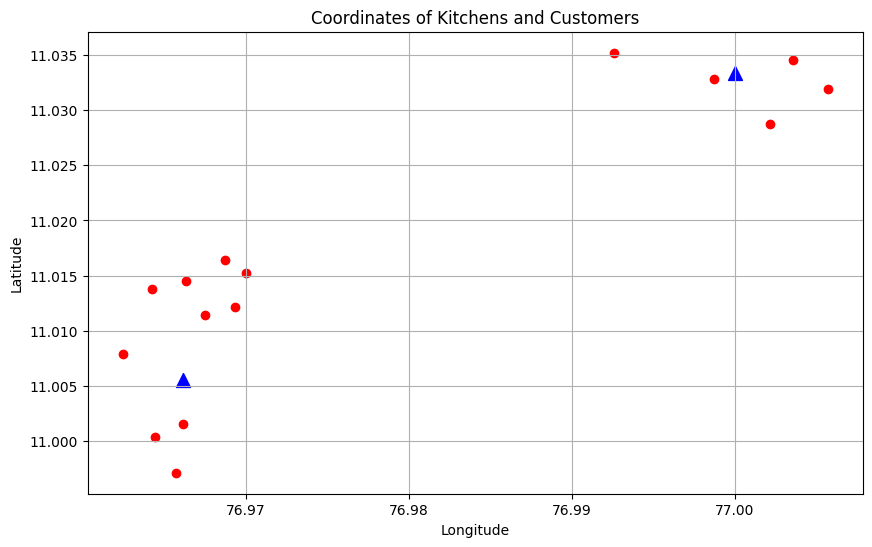

In [ ]:
# Extract coordinates of kitchens and customers
kitchen_coordinates = [(k.location.latitude, k.location.longitude) for k in kitchens]
customer_coordinates = [(c.latitude, c.longitude) for c in customers]

# Plot kitchens and customers
plt.figure(figsize=(10, 6))
for coord in kitchen_coordinates:
    plt.scatter(coord[1], coord[0], color='blue', label='Kitchen', marker='^', s=100)

for coord in customer_coordinates:
    plt.scatter(coord[1], coord[0], color='red', label='Customer', marker='o')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates of Kitchens and Customers')
plt.grid(True)
plt.show()

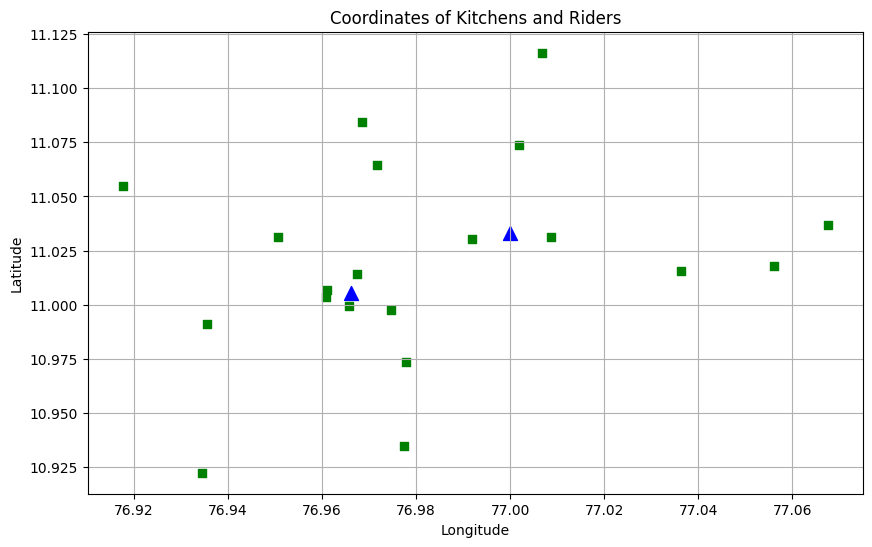

In [ ]:
# Extract coordinates of riders
rider_coordinates = [(r.location.latitude, r.location.longitude) for r in riders]

# Plot kitchens and riders
plt.figure(figsize=(10, 6))
for coord in kitchen_coordinates:
    plt.scatter(coord[1], coord[0], color='blue', label='Kitchen', marker='^', s=100)

for coord in rider_coordinates:
    plt.scatter(coord[1], coord[0], color='green', label='Rider', marker='s')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Coordinates of Kitchens and Riders')
plt.grid(True)
plt.show()

In [ ]:
#NOW WE NEED TO DEFINE DISTANCE MATRIX AND TIME MATRIX BETWEEN
#(i)Kitchen & Customers
#DISTANCE MATRIX
# Define labels
labels = ['K1', 'K2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']
# Initialize a 17x17 matrix with zeros
Kitchen_Customer_Distances_Matrix = np.zeros((17, 17))
# Helper function to find index of labels
def index(label):
    return labels.index(label)

# Define the distances between kitchens and customers
Kitchen_Customer_Distances = [
 ('K1', 'K2', 7.2), ('K1', 'C1', 0.55), ('K1', 'C2', 1.3), ('K1', 'C3', 1.5), ('K1', 'C4', 0.7), ('K1', 'C5', 1.4), ('K1', 'C6', 5.8), ('K1', 'C7', 6.3), ('K1', 'C8', 6.8), ('K1', 'C9', 6.5), ('K1', 'C10', 6), ('K1', 'C11', 0.65), ('K1', 'C12', 2), ('K1', 'C13', 1.2), ('K1', 'C14', 1.3), ('K1', 'C15', 0.65),
 ('K2', 'C1', 7.1), ('K2', 'C2', 6), ('K2', 'C3', 6.8), ('K2', 'C4', 8.3), ('K2', 'C5', 6.4), ('K2', 'C6', 3.5), ('K2', 'C7', 0.55), ('K2', 'C8', 0.45), ('K2', 'C9', 0.8), ('K2', 'C10', 0.85), ('K2', 'C11', 7.2), ('K2', 'C12', 5.6), ('K2', 'C13', 6), ('K2', 'C14', 8), ('K2', 'C15', 7.1),
 ('C1', 'C2', 1.9), ('C1', 'C3', 1.7), ('C1', 'C4', 1.1), ('C1', 'C5', 2.1), ('C1', 'C6', 6.5), ('C1', 'C7', 6.4), ('C1', 'C8', 6.9), ('C1', 'C9', 6.6), ('C1', 'C10', 6), ('C1', 'C11', 1.4), ('C1', 'C12', 2.7), ('C1', 'C13', 1.9), ('C1', 'C14', 1.1), ('C1', 'C15', 0.4),
 ('C2', 'C3', 1.6), ('C2', 'C4', 1.7), ('C2', 'C5', 0.5), ('C2', 'C6', 4.6), ('C2', 'C7', 4.9), ('C2', 'C8', 5.7), ('C2', 'C9', 5.4), ('C2', 'C10', 5.2), ('C2', 'C11', 2), ('C2', 'C12', 1.2), ('C2', 'C13', 0.4), ('C2', 'C14', 2.7), ('C2', 'C15', 2),
 ('C3', 'C4', 1.1), ('C3', 'C5', 1), ('C3', 'C6', 4.8), ('C3', 'C7', 5.1), ('C3', 'C8', 5.9), ('C3', 'C9', 5.6), ('C3', 'C10', 5.4), ('C3', 'C11', 1.6), ('C3', 'C12', 1.4), ('C3', 'C13', 0.26), ('C3', 'C14', 2.9), ('C3', 'C15', 2.2),
 ('C4', 'C5', 1.8), ('C4', 'C6', 6.2), ('C4', 'C7', 6.7), ('C4', 'C8', 7.2), ('C4', 'C9', 6.9), ('C4', 'C10', 6.4), ('C4', 'C11', 1.1), ('C4', 'C12', 2.4), ('C4', 'C13', 1.1), ('C4', 'C14', 1.8), ('C4', 'C15', 1.2),
 ('C5', 'C6', 5), ('C5', 'C7', 6.2), ('C5', 'C8', 6.7), ('C5', 'C9', 6.4), ('C5', 'C10', 5.8), ('C5', 'C11', 1), ('C5', 'C12', 1.6), ('C5', 'C13', 0.8), ('C5', 'C14', 2.3), ('C5', 'C15', 1.7),
 ('C6', 'C7', 1.7), ('C6', 'C8', 2.9), ('C6', 'C9', 2.5), ('C6', 'C10', 2.6), ('C6', 'C11', 5.1), ('C6', 'C12', 4.2), ('C6', 'C13', 4.6), ('C6', 'C14', 7.2), ('C6', 'C15', 6.5),
 ('C7', 'C8', 1.6), ('C7', 'C9', 0.85), ('C7', 'C10', 0.9), ('C7', 'C11', 6.2), ('C7', 'C12', 4.5), ('C7', 'C13', 4.9), ('C7', 'C14', 7.6), ('C7', 'C15', 6.7),
 ('C8', 'C9', 1.3), ('C8', 'C10', 0.9), ('C8', 'C11', 6.9), ('C8', 'C12', 5.3), ('C8', 'C13', 5.7), ('C8', 'C14', 7.6), ('C8', 'C15', 6.8),
 ('C9', 'C10', 0.6), ('C9', 'C11', 6.6), ('C9', 'C12', 5), ('C9', 'C13', 5.4), ('C9', 'C14', 7.3), ('C9', 'C15', 6.4),
 ('C10', 'C11', 6.5), ('C10', 'C12', 4.5), ('C10', 'C13', 4.9), ('C10', 'C14', 6.7), ('C10', 'C15', 5.9),
 ('C11', 'C12', 3.1), ('C11', 'C13', 1.3),('C11', 'C14', 2.1), ('C11', 'C15', 1.5),
 ('C12', 'C13', 0.4), ('C12', 'C14', 2.7),('C12', 'C15', 2),
 ('C13', 'C14', 2.6), ('C13', 'C15', 2),
 ('C14', 'C15', 1.2)]

# Fill the matrix
for src, dest, dist in Kitchen_Customer_Distances:
    i, j = index(src), index(dest)
    Kitchen_Customer_Distances_Matrix[i][j] = Kitchen_Customer_Distances_Matrix[j][i] = dist

# Print the matrix
print(Kitchen_Customer_Distances_Matrix)

#TIME MATRIX
Kitchen_Customer_Time_Matrix = np.zeros((17, 17))
# Helper function to find index of labels
def index(label):
    return labels.index(label)

# Define the distances between kitchens and customers
Kitchen_Customer_Time = [
 ('K1', 'K2', 16), ('K1', 'C1', 8), ('K1', 'C2', 3), ('K1', 'C3', 6), ('K1', 'C4', 10), ('K1', 'C5', 4), ('K1', 'C6', 14), ('K1', 'C7', 15), ('K1', 'C8', 15), ('K1', 'C9', 15), ('K1', 'C10', 14), ('K1', 'C11', 9), ('K1', 'C12', 5), ('K1', 'C13', 4), ('K1', 'C14', 4), ('K1', 'C15', 9),
 ('K2', 'C1', 17), ('K2', 'C2', 16), ('K2', 'C3', 18), ('K2', 'C4', 21), ('K2', 'C5', 17), ('K2', 'C6', 11), ('K2', 'C7', 8), ('K2', 'C8', 6), ('K2', 'C9', 11), ('K2', 'C10', 12), ('K2', 'C11', 17), ('K2', 'C12', 15), ('K2', 'C13', 17), ('K2', 'C14', 19), ('K2', 'C15', 17),
 ('C1', 'C2', 5), ('C1', 'C3', 6), ('C1', 'C4', 4), ('C1', 'C5', 6), ('C1', 'C6', 17), ('C1', 'C7', 16), ('C1', 'C8', 16), ('C1', 'C9', 16), ('C1', 'C10', 14), ('C1', 'C11', 4), ('C1', 'C12', 8), ('C1', 'C13', 6), ('C1', 'C14', 14), ('C1', 'C15', 6),
 ('C2', 'C3', 23), ('C2', 'C4', 5), ('C2', 'C5', 7), ('C2', 'C6', 13), ('C2', 'C7', 14), ('C2', 'C8', 16), ('C2', 'C9', 16), ('C2', 'C10', 14), ('C2', 'C11', 28), ('C2', 'C12', 4), ('C2', 'C13', 2), ('C2', 'C14', 7), ('C2', 'C15', 6),
 ('C3', 'C4', 4), ('C3', 'C5', 4), ('C3', 'C6', 14), ('C3', 'C7', 15), ('C3', 'C8', 17), ('C3', 'C9', 16), ('C3', 'C10', 15), ('C3', 'C11', 5), ('C3', 'C12', 5), ('C3', 'C13', 1), ('C3', 'C14', 8), ('C3', 'C15', 7),
 ('C4', 'C5', 6), ('C4', 'C6', 17), ('C4', 'C7', 17), ('C4', 'C8', 18), ('C4', 'C9', 18), ('C4', 'C10', 16), ('C4', 'C11', 4), ('C4', 'C12', 7), ('C4', 'C13', 5), ('C4', 'C14', 5), ('C4', 'C15', 5),
 ('C5', 'C6', 14), ('C5', 'C7', 16), ('C5', 'C8', 16), ('C5', 'C9', 16), ('C5', 'C10', 14), ('C5', 'C11', 3), ('C5', 'C12', 5), ('C5', 'C13', 4), ('C5', 'C14', 7), ('C5', 'C15', 5),
 ('C6', 'C7', 6), ('C6', 'C8', 10), ('C6', 'C9', 10), ('C6', 'C10', 9), ('C6', 'C11', 11), ('C6', 'C12', 12), ('C6', 'C13', 14), ('C6', 'C14', 17), ('C6', 'C15', 16),
 ('C7', 'C8', 5), ('C7', 'C9', 4), ('C7', 'C10', 3),('C7', 'C11', 15), ('C7', 'C12', 13), ('C7', 'C13', 15), ('C7', 'C14', 19), ('C7', 'C15', 17),
 ('C8', 'C9', 4), ('C8', 'C10', 3), ('C8', 'C11', 16), ('C8', 'C12', 14), ('C8', 'C13', 16), ('C8', 'C14', 19), ('C8', 'C15', 17),
 ('C9', 'C10', 3), ('C9', 'C11', 16), ('C9', 'C12', 14), ('C9', 'C13', 16), ('C9', 'C14', 18), ('C9', 'C15', 17),
 ('C10', 'C11', 15), ('C10', 'C12', 13), ('C10', 'C13', 15), ('C10', 'C14', 17), ('C10', 'C15', 15),
 ('C11', 'C12', 7), ('C11', 'C13', 4), ('C11', 'C14', 6), ('C11', 'C15', 4),
 ('C12', 'C13', 2), ('C12', 'C14', 7), ('C12', 'C15', 6),
 ('C13', 'C14', 8), ('C13', 'C15', 6),
 ('C14', 'C15', 3)
 ]

# Fill the matrix
for src, dest, dist in Kitchen_Customer_Time:
    i, j = index(src), index(dest)
    Kitchen_Customer_Time_Matrix[i][j] = Kitchen_Customer_Time_Matrix[j][i] = dist

# Print the matrix
print(Kitchen_Customer_Time_Matrix)

[[0.   7.2  0.55 1.3  1.5  0.7  1.4  5.8  6.3  6.8  6.5  6.   0.65 2.
  1.2  1.3  0.65]
 [7.2  0.   7.1  6.   6.8  8.3  6.4  3.5  0.55 0.45 0.8  0.85 7.2  5.6
  6.   8.   7.1 ]
 [0.55 7.1  0.   1.9  1.7  1.1  2.1  6.5  6.4  6.9  6.6  6.   1.4  2.7
  1.9  1.1  0.4 ]
 [1.3  6.   1.9  0.   1.6  1.7  0.5  4.6  4.9  5.7  5.4  5.2  2.   1.2
  0.4  2.7  2.  ]
 [1.5  6.8  1.7  1.6  0.   1.1  1.   4.8  5.1  5.9  5.6  5.4  1.6  1.4
  0.26 2.9  2.2 ]
 [0.7  8.3  1.1  1.7  1.1  0.   1.8  6.2  6.7  7.2  6.9  6.4  1.1  2.4
  1.1  1.8  1.2 ]
 [1.4  6.4  2.1  0.5  1.   1.8  0.   5.   6.2  6.7  6.4  5.8  1.   1.6
  0.8  2.3  1.7 ]
 [5.8  3.5  6.5  4.6  4.8  6.2  5.   0.   1.7  2.9  2.5  2.6  5.1  4.2
  4.6  7.2  6.5 ]
 [6.3  0.55 6.4  4.9  5.1  6.7  6.2  1.7  0.   1.6  0.85 0.9  6.2  4.5
  4.9  7.6  6.7 ]
 [6.8  0.45 6.9  5.7  5.9  7.2  6.7  2.9  1.6  0.   1.3  0.9  6.9  5.3
  5.7  7.6  6.8 ]
 [6.5  0.8  6.6  5.4  5.6  6.9  6.4  2.5  0.85 1.3  0.   0.6  6.6  5.
  5.4  7.3  6.4 ]
 [6.   0.85 6.   5.2  5

In [ ]:
#(ii)Kitchen & Riders

# Define labels for kitchens and rooms
kitchen_labels = ['K1', 'K2']
rider_labels = ['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17', 'R18', 'R19', 'R20']

# Initialize 2x20 matrices with zeros for distances and times from kitchens to rooms
Kitchen_Rider_Distances_Matrix = np.zeros((2, 20))
Kitchen_Rider_Time_Matrix = np.zeros((2, 20))

# Distance data from kitchens to rooms
distance_data = {
    ('K1', 'R1'): 0.950, ('K1', 'R2'): 0.700, ('K1', 'R3'): 2.3, ('K1', 'R4'): 6, ('K1', 'R5'): 7, ('K1', 'R6'): 1.2,
    ('K1', 'R7'): 12.7, ('K1', 'R8'): 8.3, ('K1', 'R9'): 8.9, ('K1', 'R10'): 14.4, ('K1', 'R11'): 9, ('K1', 'R12'): 1.8,
    ('K1', 'R13'): 5.2, ('K1', 'R14'): 9.5, ('K1', 'R15'): 4.1, ('K1', 'R16'): 14.4, ('K1', 'R17'): 10.4, ('K1', 'R18'): 16.8,
    ('K1', 'R19'): 11.4, ('K1', 'R20'): 6.1,
    ('K2', 'R1'): 6, ('K2', 'R2'): 7, ('K2', 'R3'): 8.8, ('K2', 'R4'): 2.6, ('K2', 'R5'): 1.5, ('K2', 'R6'): 7.9,
    ('K2', 'R7'): 10, ('K2', 'R8'): 7.7, ('K2', 'R9'): 5.9, ('K2', 'R10'): 11.4, ('K2', 'R11'): 14.2, ('K2', 'R12'): 6.6,
    ('K2', 'R13'): 11.9, ('K2', 'R14'): 15.9, ('K2', 'R15'): 9.2, ('K2', 'R16'): 20.9, ('K2', 'R17'): 7.8, ('K2', 'R18'): 10.7,
    ('K2', 'R19'): 10.5, ('K2', 'R20'): 11.6
}

# Time data from kitchens to rooms
time_data = {
    ('K1', 'R1'): 2, ('K1', 'R2'): 3, ('K1', 'R3'): 6, ('K1', 'R4'): 14, ('K1', 'R5'): 17, ('K1', 'R6'): 3,
    ('K1', 'R7'): 28, ('K1', 'R8'): 17, ('K1', 'R9'): 16, ('K1', 'R10'): 28, ('K1', 'R11'): 19, ('K1', 'R12'): 5,
    ('K1', 'R13'): 13, ('K1', 'R14'): 21, ('K1', 'R15'): 10, ('K1', 'R16'): 29, ('K1', 'R17'): 22, ('K1', 'R18'): 31,
    ('K1', 'R19'): 22, ('K1', 'R20'): 17,
    ('K2', 'R1'): 16, ('K2', 'R2'): 18, ('K2', 'R3'): 22, ('K2', 'R4'): 8, ('K2', 'R5'): 5, ('K2', 'R6'): 19,
    ('K2', 'R7'): 27, ('K2', 'R8'): 18, ('K2', 'R9'): 14, ('K2', 'R10'): 26, ('K2', 'R11'): 31, ('K2', 'R12'): 16,
    ('K2', 'R13'): 29, ('K2', 'R14'): 34, ('K2', 'R15'): 22, ('K2', 'R16'): 42, ('K2', 'R17'): 22, ('K2', 'R18'): 22,
    ('K2', 'R19'): 23, ('K2', 'R20'): 30
}

# Helper function to find index of kitchen and room labels
def kitchen_index(kitchen):
    return kitchen_labels.index(kitchen)

def rider_index(room):
    return rider_labels.index(room)

# Fill the distance and time matrices
for (kitchen, r), dist in distance_data.items():
    i, j = kitchen_index(kitchen), rider_index(r)
    Kitchen_Rider_Distances_Matrix[i][j] = dist

for (kitchen, r), time in time_data.items():
    i, j = kitchen_index(kitchen), rider_index(r)
    Kitchen_Rider_Time_Matrix[i][j] = time

# Output the matrices
print("Distance Matrix:")
print(Kitchen_Rider_Distances_Matrix)
print("\nTime Matrix:")
print(Kitchen_Rider_Time_Matrix)



Distance Matrix:
[[ 0.95  0.7   2.3   6.    7.    1.2  12.7   8.3   8.9  14.4   9.    1.8
   5.2   9.5   4.1  14.4  10.4  16.8  11.4   6.1 ]
 [ 6.    7.    8.8   2.6   1.5   7.9  10.    7.7   5.9  11.4  14.2   6.6
  11.9  15.9   9.2  20.9   7.8  10.7  10.5  11.6 ]]

Time Matrix:
[[ 2.  3.  6. 14. 17.  3. 28. 17. 16. 28. 19.  5. 13. 21. 10. 29. 22. 31.
  22. 17.]
 [16. 18. 22.  8.  5. 19. 27. 18. 14. 26. 31. 16. 29. 34. 22. 42. 22. 22.
  23. 30.]]


In [ ]:
# Sort orders based on their order ready time
sorted_orders = sorted(orders, key=lambda x: x.order_ready_time)

In [ ]:
# Step 2: Initialize groups
group1_orders = []  # Orders from customers who only ordered from kitchen 1
group2_orders = []  # Orders from customers who only ordered from kitchen 2
group3_orders = []  # Orders from customers who ordered from both kitchens

# Step 3: Iterate through each unique customer in the orders list
unique_customers = set(order.drop_off_location for order in sorted_orders)

for customer in unique_customers:
    # Step 4: Determine which group the customer belongs to
    kitchens_ordered_from = set(order.kitchen_id for order in sorted_orders if order.drop_off_location == customer)

    if 'K1' in kitchens_ordered_from and 'K2' not in kitchens_ordered_from:
        group1_orders.extend([order for order in sorted_orders if order.drop_off_location == customer])
    elif 'K2' in kitchens_ordered_from and 'K1' not in kitchens_ordered_from:
        group2_orders.extend([order for order in sorted_orders if order.drop_off_location == customer])
    else:
        group3_orders.extend([order for order in sorted_orders if order.drop_off_location == customer])

print(group1_orders)
print("*****************************")
print(group2_orders)
print("*****************************")
print(group3_orders)
print("*****************************")

[OrderDetail(order_id='Order 8', food_items=[FoodItem(name='Salad', preparation_time=8), FoodItem(name='Variety Rice', preparation_time=9), FoodItem(name='Idli', preparation_time=30), FoodItem(name='Meals', preparation_time=10)], kitchen_id='K1', pick_up_location=Location(address='K1', latitude=11.00555, longitude=76.96612), drop_off_location=Location(address='Customer 9', latitude=11.02879, longitude=77.00213), order_time=datetime.datetime(2024, 3, 2, 3, 43, 35, 605735), order_ready_time=datetime.datetime(2024, 3, 2, 4, 2, 35, 605735))]
*****************************
[OrderDetail(order_id='Order 22', food_items=[FoodItem(name='Variety Rice', preparation_time=9), FoodItem(name='Salad', preparation_time=8)], kitchen_id='K2', pick_up_location=Location(address='K2', latitude=11.03333, longitude=77), drop_off_location=Location(address='Customer 13', latitude=10.99712, longitude=76.96569), order_time=datetime.datetime(2024, 3, 2, 3, 43, 35, 605932), order_ready_time=datetime.datetime(2024, 3

In [ ]:
#PROCESSING GROUP 1.

# Step 1: Define the labels
labels = ['K1', 'K2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']

# Step 2: Define a function to get the index of a label
def index(label):
    return labels.index(label)

# Step 3: Define a function to check if the time difference between orders is less than or equal to 10 minutes
def within_10_minutes(order1, order2):
    return (order2.order_ready_time - order1.order_ready_time).total_seconds() <= 600

# Step 4: Divide the 1st group into further subgroups based on order_ready_time
subgroups = []
remaining_orders = sorted(group1_orders, key=lambda x: x.order_ready_time)

while remaining_orders:
    start_order = remaining_orders.pop(0)
    current_subgroup = [start_order]
    end_time = start_order.order_ready_time + timedelta(minutes=10)

    i = 0
    while i < len(remaining_orders):
        if remaining_orders[i].order_ready_time <= end_time:
            current_subgroup.append(remaining_orders.pop(i))
        else:
            i += 1

    subgroups.append(current_subgroup)

# Print the subgroups
print("AFTER THE GROUPS OF GROUP 1 ARE SUBGROUPED BASED ON READY-TIME")
for i, subgroup in enumerate(subgroups):
    print(f"Subgroup {i+1}:")
    for order in subgroup:
        print(f"Order ID: {order.order_id}, Ready Time: {order.order_ready_time}")


AFTER THE GROUPS OF GROUP 1 ARE SUBGROUPED BASED ON READY-TIME
Subgroup 1:
Order ID: Order 8, Ready Time: 2024-03-02 04:02:35.605735


In [ ]:
# Initialize an empty list to store the grouped orders
Grouped_K1_ORDERS = []

# Step 1: Define a function to calculate the total distance between a list of orders
def calculate_total_distance(orders):
    total_distance = 0
    for i in range(len(orders) - 1):
        loc1 = orders[i].drop_off_location[0]  # Extracting the customer label from the location
        loc2 = orders[i + 1].drop_off_location[0]
        index1 = int(loc1.split()[1]) - 1  # Extract the customer index from the label and convert to zero-based index
        index2 = int(loc2.split()[1]) - 1
        total_distance += Kitchen_Customer_Distances_Matrix[index1][index2]
    return total_distance

# Step 2: Divide each subgroup into further subgroups based on distance
for i, subgroup in enumerate(subgroups):
    print(f"Subgroup {i+1}:")
    sub_subgroups = []
    current_sub_subgroup = []

    # Group orders from the same customer together
    same_customer_orders = {}
    for order in subgroup:
        customer = order.drop_off_location[0]
        if customer not in same_customer_orders:
            same_customer_orders[customer] = []
        same_customer_orders[customer].append(order)

    for customer_orders in same_customer_orders.values():
        if len(customer_orders) > 1:
            sub_subgroups.append(customer_orders)
        else:
            if not current_sub_subgroup:
                current_sub_subgroup.extend(customer_orders)
            else:
                # Calculate the total distance if the current order is added to the current sub-subgroup
                current_distance = calculate_total_distance(current_sub_subgroup + customer_orders)

                if current_distance <= 3:  # Check if the total distance is less than or equal to 3 km
                    # Add the current order to the current sub-subgroup
                    current_sub_subgroup.extend(customer_orders)
                else:
                    # Start a new sub-subgroup
                    sub_subgroups.append(current_sub_subgroup)
                    current_sub_subgroup = customer_orders

    # Add the last sub-subgroup
    if current_sub_subgroup:
        sub_subgroups.append(current_sub_subgroup)

    # Print the sub-subgroups
    for j, sub_subgroup in enumerate(sub_subgroups):
        print(f"  Sub-subgroup {j+1}:")
        Grouped_K1_ORDERS.append(sub_subgroup)
        for order in sub_subgroup:
            print(f"    Order ID: {order.order_id}, Drop-off Location: {order.drop_off_location[0]}")

    print()


Subgroup 1:
  Sub-subgroup 1:
    Order ID: Order 8, Drop-off Location: Customer 9



In [ ]:
print(Grouped_K1_ORDERS)

[[OrderDetail(order_id='Order 8', food_items=[FoodItem(name='Salad', preparation_time=8), FoodItem(name='Variety Rice', preparation_time=9), FoodItem(name='Idli', preparation_time=30), FoodItem(name='Meals', preparation_time=10)], kitchen_id='K1', pick_up_location=Location(address='K1', latitude=11.00555, longitude=76.96612), drop_off_location=Location(address='Customer 9', latitude=11.02879, longitude=77.00213), order_time=datetime.datetime(2024, 3, 2, 3, 43, 35, 605735), order_ready_time=datetime.datetime(2024, 3, 2, 4, 2, 35, 605735))]]


In [ ]:
print(len(group3_orders))

# Initialize an empty list to store the single order groups
single_order_groups = []

# Iterate through the groups in Grouped_K1_ORDERS
for group in Grouped_K1_ORDERS:
    # Check if the group contains only one order
    if len(group) == 1:
        # Append the order to group3_orders
        group3_orders.append(group[0])
    else:
        # Append the group to single_order_groups
        single_order_groups.append(group)

# Remove the single-order groups from Grouped_K1_ORDERS
Grouped_K1_ORDERS = single_order_groups

print(len(group3_orders))

13
14


In [ ]:
#PROCESSING GROUP 2.

# Step 1: Define the labels
labels = ['K1', 'K2', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15']

# Step 2: Define a function to get the index of a label
def index(label):
    return labels.index(label)

# Step 3: Define a function to check if the time difference between orders is less than or equal to 10 minutes
def within_10_minutes(order1, order2):
    return (order2.order_ready_time - order1.order_ready_time).total_seconds() <= 600

# Step 4: Divide the 2nd group into further subgroups based on order_ready_time
subgroups = []
remaining_orders = sorted(group2_orders, key=lambda x: x.order_ready_time)

while remaining_orders:
    start_order = remaining_orders.pop(0)
    current_subgroup = [start_order]
    end_time = start_order.order_ready_time + timedelta(minutes=10)

    i = 0
    while i < len(remaining_orders):
        if remaining_orders[i].order_ready_time <= end_time:
            current_subgroup.append(remaining_orders.pop(i))
        else:
            i += 1

    subgroups.append(current_subgroup)

# Print the subgroups
print("AFTER THE GROUPS OF GROUP 2 ARE SUBGROUPED BASED ON READY-TIME")
for i, subgroup in enumerate(subgroups):
    print(f"Subgroup {i+1}:")
    for order in subgroup:
        print(f"Order ID: {order.order_id}, Ready Time: {order.order_ready_time}")


AFTER THE GROUPS OF GROUP 2 ARE SUBGROUPED BASED ON READY-TIME
Subgroup 1:
Order ID: Order 24, Ready Time: 2024-03-02 03:54:35.605957
Order ID: Order 12, Ready Time: 2024-03-02 03:55:35.605798
Order ID: Order 15, Ready Time: 2024-03-02 04:00:35.605840
Order ID: Order 3, Ready Time: 2024-03-02 04:01:35.605663
Order ID: Order 22, Ready Time: 2024-03-02 04:01:35.605932
Order ID: Order 19, Ready Time: 2024-03-02 04:02:35.605892
Subgroup 2:
Order ID: Order 25, Ready Time: 2024-03-02 04:06:35.605971
Order ID: Order 9, Ready Time: 2024-03-02 04:07:35.605749
Order ID: Order 10, Ready Time: 2024-03-02 04:07:35.605765
Order ID: Order 13, Ready Time: 2024-03-02 04:07:35.605813
Order ID: Order 5, Ready Time: 2024-03-02 04:09:35.605692


In [ ]:
# Initialize an empty list to store the grouped orders
Grouped_K2_ORDERS = []
# Step 1: Define a function to calculate the total distance between a list of orders
def calculate_total_distance(orders):
    total_distance = 0
    for i in range(len(orders) - 1):
        loc1 = orders[i].drop_off_location[0]  # Extracting the customer label from the location
        loc2 = orders[i + 1].drop_off_location[0]
        index1 = int(loc1.split()[1]) - 1  # Extract the customer index from the label and convert to zero-based index
        index2 = int(loc2.split()[1]) - 1
        total_distance += Kitchen_Customer_Distances_Matrix[index1][index2]
    return total_distance

# Step 2: Divide each subgroup into further subgroups based on distance
for i, subgroup in enumerate(subgroups):
    print(f"Subgroup {i+1}:")
    sub_subgroups = []
    current_sub_subgroup = []

    # Group orders from the same customer together
    same_customer_orders = {}
    for order in subgroup:
        customer = order.drop_off_location[0]
        if customer not in same_customer_orders:
            same_customer_orders[customer] = []
        same_customer_orders[customer].append(order)

    for customer_orders in same_customer_orders.values():
        if len(customer_orders) > 1:
            sub_subgroups.append(customer_orders)
        else:
            if not current_sub_subgroup:
                current_sub_subgroup.extend(customer_orders)
            else:
                # Calculate the total distance if the current order is added to the current sub-subgroup
                current_distance = calculate_total_distance(current_sub_subgroup + customer_orders)

                if current_distance <= 3:  # Check if the total distance is less than or equal to 3 km
                    # Add the current order to the current sub-subgroup
                    current_sub_subgroup.extend(customer_orders)
                else:
                    # Start a new sub-subgroup
                    sub_subgroups.append(current_sub_subgroup)
                    current_sub_subgroup = customer_orders

    # Add the last sub-subgroup
    if current_sub_subgroup:
        sub_subgroups.append(current_sub_subgroup)

    # Print the sub-subgroups
    for j, sub_subgroup in enumerate(sub_subgroups):
        print(f"  Sub-subgroup {j+1}:")
        Grouped_K2_ORDERS.append(sub_subgroup)
        for order in sub_subgroup:
            print(f"    Order ID: {order.order_id}, Drop-off Location: {order.drop_off_location[0]}")

    print()


Subgroup 1:
  Sub-subgroup 1:
    Order ID: Order 24, Drop-off Location: Customer 10
    Order ID: Order 12, Drop-off Location: Customer 2
  Sub-subgroup 2:
    Order ID: Order 15, Drop-off Location: Customer 0
    Order ID: Order 3, Drop-off Location: Customer 14
  Sub-subgroup 3:
    Order ID: Order 22, Drop-off Location: Customer 13
  Sub-subgroup 4:
    Order ID: Order 19, Drop-off Location: Customer 11

Subgroup 2:
  Sub-subgroup 1:
    Order ID: Order 25, Drop-off Location: Customer 5
    Order ID: Order 9, Drop-off Location: Customer 5
    Order ID: Order 10, Drop-off Location: Customer 5
    Order ID: Order 5, Drop-off Location: Customer 5
  Sub-subgroup 2:
    Order ID: Order 13, Drop-off Location: Customer 11



In [ ]:
print(Grouped_K2_ORDERS)

[[OrderDetail(order_id='Order 24', food_items=[FoodItem(name='Variety Rice', preparation_time=9), FoodItem(name='Meals', preparation_time=10), FoodItem(name='Poori', preparation_time=17), FoodItem(name='Idli', preparation_time=30), FoodItem(name='Salad', preparation_time=8)], kitchen_id='K2', pick_up_location=Location(address='K2', latitude=11.03333, longitude=77), drop_off_location=Location(address='Customer 10', latitude=11.01144, longitude=76.96747), order_time=datetime.datetime(2024, 3, 2, 3, 43, 35, 605957), order_ready_time=datetime.datetime(2024, 3, 2, 3, 54, 35, 605957)), OrderDetail(order_id='Order 12', food_items=[FoodItem(name='Variety Rice', preparation_time=9), FoodItem(name='Poori', preparation_time=17), FoodItem(name='Salad', preparation_time=8), FoodItem(name='Idli', preparation_time=30), FoodItem(name='Meals', preparation_time=10)], kitchen_id='K2', pick_up_location=Location(address='K2', latitude=11.03333, longitude=77), drop_off_location=Location(address='Customer 2'

In [ ]:
print(len(group3_orders))


# Initialize an empty list to store the single order groups
single_order_groups = []

# Iterate through the groups in Grouped_K1_ORDERS
for group in Grouped_K2_ORDERS:
    # Check if the group contains only one order
    if len(group) == 1:
        # Append the order to group3_orders
        group3_orders.append(group[0])
    else:
        # Append the group to single_order_groups
        single_order_groups.append(group)

# Remove the single-order groups from Grouped_K1_ORDERS
Grouped_K2_ORDERS = single_order_groups

print(len(group3_orders))

14
17


In [ ]:
#FINDING THE NEAREST RIDERS
# Initialize lists to store the nearest riders for each kitchen
nearest_riders_k1 = []
nearest_riders_k2 = []

# Calculate combined metric (distance + time) for each rider for kitchen 1
combined_metric_k1 = [Kitchen_Rider_Distances_Matrix[0][i] + Kitchen_Rider_Time_Matrix[0][i] for i in range(len(rider_labels))]

# Find the indices of riders with the minimum combined metric for kitchen 1
min_combined_metric_indices_k1 = sorted(range(len(combined_metric_k1)), key=lambda i: combined_metric_k1[i])[:10]

# Populate the nearest riders list for kitchen 1
for index in min_combined_metric_indices_k1:
    nearest_riders_k1.append(riders[index])

# Calculate combined metric (distance + time) for each rider for kitchen 2
combined_metric_k2 = [Kitchen_Rider_Distances_Matrix[1][i] + Kitchen_Rider_Time_Matrix[1][i] for i in range(len(rider_labels))]

# Find the indices of riders with the minimum combined metric for kitchen 2
min_combined_metric_indices_k2 = sorted(range(len(combined_metric_k2)), key=lambda i: combined_metric_k2[i])[:10]

# Populate the nearest riders list for kitchen 2
for index in min_combined_metric_indices_k2:
    nearest_riders_k2.append(riders[index])

# Output the lists of nearest riders for each kitchen
print("Nearest riders to Kitchen 1:")
print(nearest_riders_k1)
print("\nNearest riders to Kitchen 2:")
print(nearest_riders_k2)


Nearest riders to Kitchen 1:
[RiderDetail(rider_id='Rider 1', location=Location(address='Rider 1', latitude=11.01402, longitude=76.96747)), RiderDetail(rider_id='Rider 2', location=Location(address='Rider 2', latitude=10.99953, longitude=76.96569)), RiderDetail(rider_id='Rider 6', location=Location(address='Rider 6', latitude=11.00363, longitude=76.96093)), RiderDetail(rider_id='Rider 12', location=Location(address='Rider 12', latitude=10.99772, longitude=76.97468)), RiderDetail(rider_id='Rider 3', location=Location(address='Rider 3', latitude=11.00681, longitude=76.96119)), RiderDetail(rider_id='Rider 15', location=Location(address='Rider 15', latitude=11.03126, longitude=76.95073)), RiderDetail(rider_id='Rider 13', location=Location(address='Rider 13', latitude=10.99101, longitude=76.93552)), RiderDetail(rider_id='Rider 4', location=Location(address='Rider 4', latitude=11.03015, longitude=76.99196)), RiderDetail(rider_id='Rider 20', location=Location(address='Rider 20', latitude=10.9

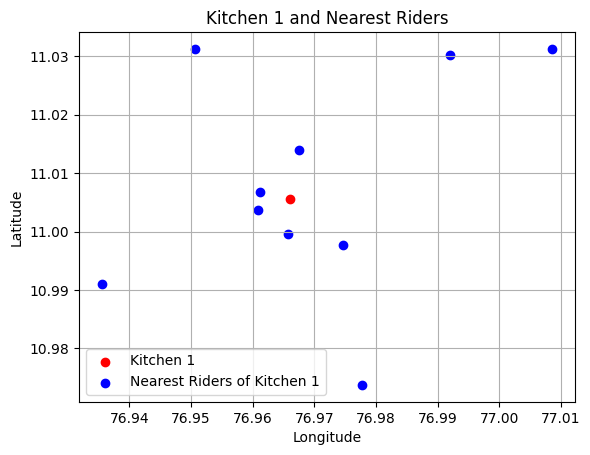

In [ ]:
#PLOTTING THE KITCHEN 1 AND IT'S NEAREST RIDERS

# Define function to plot coordinates
def plot_coordinates(locations, label, color):
    x = [location.longitude for location in locations]
    y = [location.latitude for location in locations]
    plt.scatter(x, y, label=label, color=color)

# Plot Kitchen 1 coordinates
plot_coordinates([kitchen.location for kitchen in kitchens if kitchen.kitchen_id == 'K1'], 'Kitchen 1', 'red')

# Plot coordinates of nearest riders of Kitchen 1
plot_coordinates([rider.location for rider in nearest_riders_k1], 'Nearest Riders of Kitchen 1', 'blue')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kitchen 1 and Nearest Riders')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


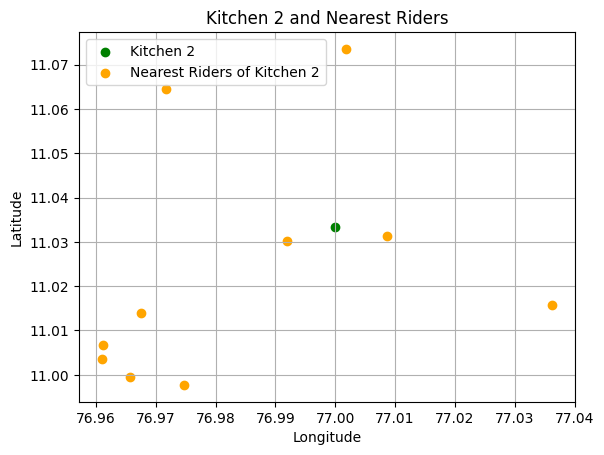

In [ ]:
#PLOTTING THE KITCHEN 1 AND IT'S NEAREST RIDERS
# Define function to plot coordinates
def plot_coordinates(locations, label, color):
    x = [location.longitude for location in locations]
    y = [location.latitude for location in locations]
    plt.scatter(x, y, label=label, color=color)

# Plot Kitchen 2 coordinates
plot_coordinates([kitchen.location for kitchen in kitchens if kitchen.kitchen_id == 'K2'], 'Kitchen 2', 'green')

# Plot coordinates of nearest riders of Kitchen 2
plot_coordinates([rider.location for rider in nearest_riders_k2], 'Nearest Riders of Kitchen 2', 'orange')

# Set labels and title
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Kitchen 2 and Nearest Riders')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from itertools import permutations

# Assuming that necessary data structures like `riders`, `Grouped_K1_ORDERS`,
# `Kitchen_Rider_Distances_Matrix`, and `Kitchen_Rider_Time_Matrix` are already defined.

# Utility functions for indices
def kitchen_index(kitchen):
    return labels.index(kitchen)

# Function to get the index of a rider_id in the rider_labels list
def rider_index(rider_id):
    # Extract the numerical part of the rider_id and convert it to an integer
    rider_num = int(rider_id.split()[-1]) - 1  # Subtract 1 to convert from 1-indexed to 0-indexed
    return rider_num if 0 <= rider_num < len(rider_labels) else None

def customer_index(customer_address):
    # Map customer address to the corresponding label used in the matrices
    if customer_address.startswith('Customer'):
        index = int(customer_address.split()[1]) - 1  # Extract the index from the address
        return index + 2  # Adjust for the kitchen labels 'K1' and 'K2'
    else:
        return labels.index(customer_address)  # Use the original logic for non-customer addresses


# Function to calculate the total distance and time for a delivery sequence
def calculate_metrics(rider, delivery_sequence, kitchen_location='K1'):
    total_distance = Kitchen_Rider_Distances_Matrix[kitchen_index(kitchen_location)][rider_index(rider.rider_id)]
    total_time = Kitchen_Rider_Time_Matrix[kitchen_index(kitchen_location)][rider_index(rider.rider_id)]
    current_location = kitchen_location

    for order in delivery_sequence:
        next_location = order.drop_off_location.address
        distance = Kitchen_Customer_Distances_Matrix[customer_index(current_location)][customer_index(next_location)]
        time = Kitchen_Customer_Time_Matrix[customer_index(current_location)][customer_index(next_location)]
        total_distance += distance
        total_time += time
        current_location = next_location

    return total_distance, total_time

# Assigns orders to riders, attempting to minimize total delivery time
def assign_orders_to_riders(orders_grouped_by_kitchen, nearest_riders):
    assignments = []

    for order_batch in orders_grouped_by_kitchen:
        best_assignment = None

        for rider in nearest_riders:
            for sequence in permutations(order_batch):
                distance, time = calculate_metrics(rider, sequence)
                if not best_assignment or time < best_assignment['time']:
                    best_assignment = {'rider': rider, 'sequence': sequence, 'distance': distance, 'time': time}

        if best_assignment:
            assignments.append(best_assignment)
            # Remove assigned rider from consideration for subsequent batches
            nearest_riders = [r for r in nearest_riders if r != best_assignment['rider']]

    return assignments

# Main execution
nearest_riders_k1_ids = [r.rider_id.strip() for r in nearest_riders_k1]  # Strip leading and trailing whitespaces
nearest_riders_k1_objects = [r for r in riders if r.rider_id.strip() in nearest_riders_k1_ids]  # Strip leading and trailing whitespaces
print(nearest_riders_k1_objects)
assignments = assign_orders_to_riders(Grouped_K1_ORDERS, nearest_riders_k1_objects)

# Displaying the assignments
if assignments:
    for assignment in assignments:
        rider_id = assignment['rider'].rider_id
        sequence = ' -> '.join([order.drop_off_location.address for order in assignment['sequence']])
        distance = assignment['distance']
        time = assignment['time']
        print(f"Rider {rider_id} assigned sequence: {sequence}")
        print(f"Total distance: {distance:.2f} km, Total time: {time:.2f} min\n")
else:
    print("No assignments made.")


[RiderDetail(rider_id='Rider 1', location=Location(address='Rider 1', latitude=11.01402, longitude=76.96747)), RiderDetail(rider_id='Rider 2', location=Location(address='Rider 2', latitude=10.99953, longitude=76.96569)), RiderDetail(rider_id='Rider 3', location=Location(address='Rider 3', latitude=11.00681, longitude=76.96119)), RiderDetail(rider_id='Rider 4', location=Location(address='Rider 4', latitude=11.03015, longitude=76.99196)), RiderDetail(rider_id='Rider 5', location=Location(address='Rider 5', latitude=11.03125, longitude=77.00863)), RiderDetail(rider_id='Rider 6', location=Location(address='Rider 6', latitude=11.00363, longitude=76.96093)), RiderDetail(rider_id='Rider 12', location=Location(address='Rider 12', latitude=10.99772, longitude=76.97468)), RiderDetail(rider_id='Rider 13', location=Location(address='Rider 13', latitude=10.99101, longitude=76.93552)), RiderDetail(rider_id='Rider 15', location=Location(address='Rider 15', latitude=11.03126, longitude=76.95073)), Rid

In [ ]:
import numpy as np
from itertools import permutations

# Assuming that necessary data structures like `riders`, `Grouped_K1_ORDERS`,
# `Kitchen_Rider_Distances_Matrix`, and `Kitchen_Rider_Time_Matrix` are already defined.

# Utility functions for indices
def kitchen_index(kitchen):
    return labels.index(kitchen)

# Function to get the index of a rider_id in the rider_labels list
def rider_index(rider_id):
    # Extract the numerical part of the rider_id and convert it to an integer
    rider_num = int(rider_id.split()[-1]) - 1  # Subtract 1 to convert from 1-indexed to 0-indexed
    return rider_num if 0 <= rider_num < len(rider_labels) else None

def customer_index(customer_address):
    # Map customer address to the corresponding label used in the matrices
    if customer_address.startswith('Customer'):
        index = int(customer_address.split()[1]) - 1  # Extract the index from the address
        return index + 2  # Adjust for the kitchen labels 'K1' and 'K2'
    else:
        return labels.index(customer_address)  # Use the original logic for non-customer addresses


def calculate_metrics(rider, delivery_sequence, kitchen_location='K2'):
    total_distance = 0
    total_time = 0
    current_location = kitchen_location

    # Go to the kitchen first
    kitchen_distance = Kitchen_Rider_Distances_Matrix[kitchen_index(current_location)][rider_index(rider.rider_id)]
    kitchen_time = Kitchen_Rider_Time_Matrix[kitchen_index(current_location)][rider_index(rider.rider_id)]
    total_distance += kitchen_distance
    total_time += kitchen_time

    for i in range(len(delivery_sequence)):
        next_location = delivery_sequence[i].drop_off_location.address
        distance = Kitchen_Customer_Distances_Matrix[customer_index(current_location)][customer_index(next_location)]
        time = Kitchen_Customer_Time_Matrix[customer_index(current_location)][customer_index(next_location)]
        total_distance += distance
        total_time += time
        current_location = next_location

        # Check if there are more customers to deliver
        if i < len(delivery_sequence) - 1:
            # Consider different routes for delivery
            next_customer_locations = [order.drop_off_location.address for order in delivery_sequence[i + 1:]]
            route1_distance = distance
            route2_distance = Kitchen_Customer_Distances_Matrix[customer_index(current_location)][customer_index(next_customer_locations[0])]
            if len(next_customer_locations) > 1:
                route1_distance += Kitchen_Customer_Distances_Matrix[customer_index(next_customer_locations[0])][customer_index(next_customer_locations[1])]
                route2_distance += Kitchen_Customer_Distances_Matrix[customer_index(current_location)][customer_index(next_customer_locations[1])]

            # Choose the minimum distance route
            if route2_distance < route1_distance:
                total_distance += route2_distance
                total_time += Kitchen_Customer_Time_Matrix[customer_index(current_location)][customer_index(next_customer_locations[0])]
                if len(next_customer_locations) > 1:
                    current_location = next_customer_locations[1]
            else:
                total_distance += route1_distance
                total_time += time

    return total_distance, total_time

def assign_orders_to_riders(orders_grouped_by_kitchen, nearest_riders):
    assignments = []

    for order_batch in orders_grouped_by_kitchen:
        best_assignment = None

        for rider in nearest_riders:
            for sequence in permutations(order_batch):
                distance, time = calculate_metrics(rider, sequence)
                if not best_assignment or time < best_assignment['time']:
                    best_assignment = {'rider': rider, 'sequence': sequence, 'distance': distance, 'time': time}

        if best_assignment:
            assignments.append(best_assignment)
            nearest_riders = [r for r in nearest_riders if r != best_assignment['rider']]

    return assignments

# Main execution
nearest_riders_k2_ids = [r.rider_id.strip() for r in nearest_riders_k2]  # Strip leading and trailing whitespaces
nearest_riders_k2_objects = [r for r in riders if r.rider_id.strip() in nearest_riders_k2_ids]  # Strip leading and trailing whitespaces
print(nearest_riders_k2_objects)
assignments = assign_orders_to_riders(Grouped_K2_ORDERS, nearest_riders_k2_objects)

# Displaying the assignments
if assignments:
    for assignment in assignments:
        rider_id = assignment['rider'].rider_id
        sequence = ' -> '.join([order.drop_off_location.address for order in assignment['sequence']])
        distance = assignment['distance']
        time = assignment['time']
        print(f"Rider {rider_id} assigned sequence: {sequence}")
        print(f"Total distance: {distance:.2f} km, Total time: {time:.2f} min\n")
else:
    print("No assignments made.")


[RiderDetail(rider_id='Rider 1', location=Location(address='Rider 1', latitude=11.01402, longitude=76.96747)), RiderDetail(rider_id='Rider 2', location=Location(address='Rider 2', latitude=10.99953, longitude=76.96569)), RiderDetail(rider_id='Rider 3', location=Location(address='Rider 3', latitude=11.00681, longitude=76.96119)), RiderDetail(rider_id='Rider 4', location=Location(address='Rider 4', latitude=11.03015, longitude=76.99196)), RiderDetail(rider_id='Rider 5', location=Location(address='Rider 5', latitude=11.03125, longitude=77.00863)), RiderDetail(rider_id='Rider 6', location=Location(address='Rider 6', latitude=11.00363, longitude=76.96093)), RiderDetail(rider_id='Rider 8', location=Location(address='Rider 8', latitude=11.06447, longitude=76.97164)), RiderDetail(rider_id='Rider 9', location=Location(address='Rider 9', latitude=11.07353, longitude=77.00181)), RiderDetail(rider_id='Rider 12', location=Location(address='Rider 12', latitude=10.99772, longitude=76.97468)), RiderDe

In [ ]:
from datetime import timedelta

# Step 1: Define the function to calculate the time difference between two order ready times
def time_difference(order1, order2):
    return abs((order1.order_ready_time - order2.order_ready_time).total_seconds() / 60)

# Step 2: Initialize groups
grouped_orders = []

# Step 3: Iterate through each order in group3_orders
for i in range(len(group3_orders)):
    current_order = group3_orders[i]
    if current_order in [order for group in grouped_orders for order in group]:
        continue  # Skip orders already grouped

    current_order_grouped = False

    # Check for rule 1: Same customer ordered from both kitchens (K1 and K2) within 10 minutes
    for j in range(i + 1, len(group3_orders)):
        next_order = group3_orders[j]
        if (current_order.drop_off_location == next_order.drop_off_location and
            current_order.kitchen_id != next_order.kitchen_id and
            time_difference(current_order, next_order) <= 30):
            if next_order not in [order for group in grouped_orders for order in group]:
                grouped_orders.append([current_order, next_order])
                current_order_grouped = True
                break

    if current_order_grouped:
        continue

    # Check for rule 2: Same pick-up location
    for grouped_order in grouped_orders:
        if current_order.pick_up_location == grouped_order[0].pick_up_location:
            grouped_order.append(current_order)
            current_order_grouped = True
            break

    if current_order_grouped:
        continue

    # Check for rule 3: Same drop-off location
    for grouped_order in grouped_orders:
        if current_order.drop_off_location == grouped_order[0].drop_off_location:
            grouped_order.append(current_order)
            current_order_grouped = True
            break

    if current_order_grouped:
        continue

    # Check for rule 4: Same kitchen ID
    for grouped_order in grouped_orders:
        if current_order.kitchen_id == grouped_order[0].kitchen_id:
            grouped_order.append(current_order)
            current_order_grouped = True
            break

    if not current_order_grouped:
        grouped_orders.append([current_order])

# Print the grouped orders
for group in grouped_orders:
    print("Group:")
    for order in group:
        print(order)
    print("\n")

print(grouped_orders)

Group:
OrderDetail(order_id='Order 7', food_items=[FoodItem(name='Idli', preparation_time=30)], kitchen_id='K1', pick_up_location=Location(address='K1', latitude=11.00555, longitude=76.96612), drop_off_location=Location(address='Customer 6', latitude=11.03285, longitude=76.99872), order_time=datetime.datetime(2024, 3, 2, 3, 43, 35, 605721), order_ready_time=datetime.datetime(2024, 3, 2, 4, 3, 35, 605721))
OrderDetail(order_id='Order 11', food_items=[FoodItem(name='Idli', preparation_time=30), FoodItem(name='Meals', preparation_time=10), FoodItem(name='Poori', preparation_time=17), FoodItem(name='Variety Rice', preparation_time=9)], kitchen_id='K2', pick_up_location=Location(address='K2', latitude=11.03333, longitude=77), drop_off_location=Location(address='Customer 6', latitude=11.03285, longitude=76.99872), order_time=datetime.datetime(2024, 3, 2, 3, 43, 35, 605782), order_ready_time=datetime.datetime(2024, 3, 2, 4, 8, 35, 605782))
OrderDetail(order_id='Order 20', food_items=[FoodItem